Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "skkali"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [8]:
from scipy.special import gamma, factorial
def getSphereVolumeExact(D, R = 1.0):
    V = np.pi ** (D / 2) / gamma(1 + D / 2)    
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

Объём 2-мерной сферы 3.141592653589793, по формуле же - 3.141592653589793
Объём 3-мерной сферы 4.1887902047863905, по формуле же - 4.188790204786391


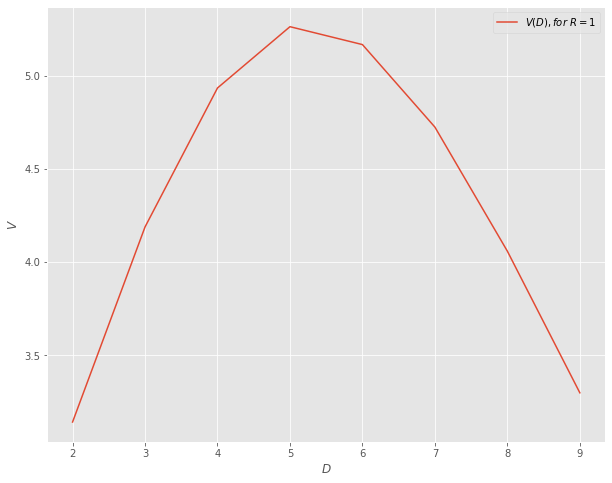

In [9]:
d_volume = {
            2: np.pi,
            3: 4 / 3 * np.pi
            }
for i in range(2, 4):
    print(f'Объём {i}-мерной сферы {d_volume[i]}, по формуле же - {getSphereVolumeExact(i)}')

D = np.arange(2, 10)
plt.figure(figsize=(10, 8))
plt.xlabel(r'$D$')
plt.ylabel(r'$V$')
plt.plot(D, getSphereVolumeExact(D), label=r'$V(D), for \ R = 1$')
plt.legend()
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [10]:
def getSphereVolumePseudorandom(N, D, R = 1):
    def inside(v, r):
        return (v ** 2).sum() < r ** 2
    
    
    set_of_points = np.random.uniform(low = -R, high = R, size = (N, D))
    N_iside = np.count_nonzero([inside(set_of_points[i], R) for i in range(len(set_of_points))])
    Omega_C = (2 * R) ** D
    V = N_iside / N * Omega_C
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

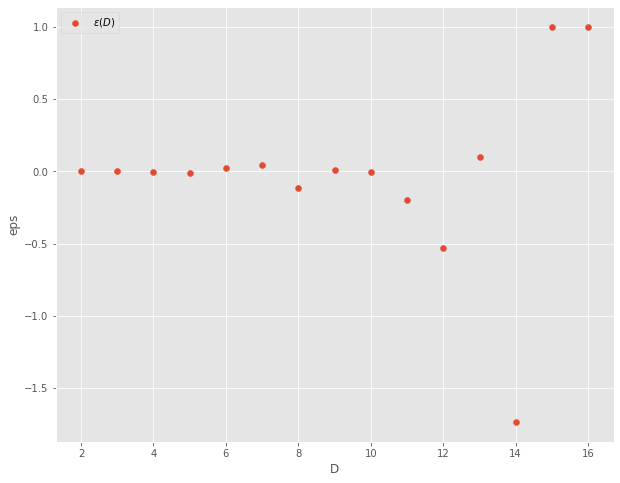

In [16]:
N = 10000
D = np.arange(2, 17)
eps_list = []

for d in D:
    eps = 1 - getSphereVolumePseudorandom(N, d) / getSphereVolumeExact(d)
    eps_list.append(eps)

plt.figure(figsize=(10, 8))
plt.xlabel('D')
plt.ylabel('eps')
plt.grid(True)
plt.scatter(D, eps_list, label=r'$\varepsilon(D)$')
plt.legend()
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [19]:
!pip install sobol_seq 
import sobol_seq


Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [20]:
sobol_seq.i4_sobol_generate?

In [21]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    p = 0
    x = np.transpose(sobol_seq.i4_sobol_generate(D, N))
    for i in range(D):
        p += x[i]**2
    m = p < R**2
    V = 2**D * np.count_nonzero(m) / N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

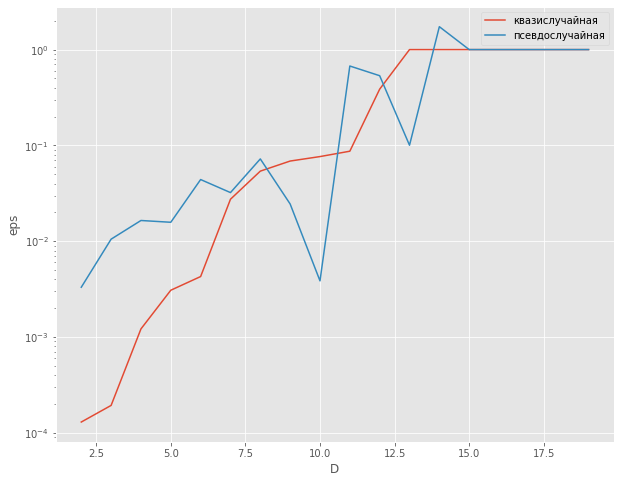

In [31]:
N = 10000
D = np.arange(2, 20)
eps_q = []
eps_p = []

for d in D:
    V = getSphereVolumeExact(d)
    eps = abs(1 - getSphereVolumeQuasirandom(N, d) / V)
    eps1 = abs(1 - getSphereVolumePseudorandom(N, d) / V)

    eps_q.append(eps)
    eps_p.append(eps1)
    
plt.figure(figsize = (10, 8))
plt.plot(D, eps_q, '-', label = 'квазислучайная')
plt.plot(D, eps_p, '-', label = 'псевдослучайная')
plt.legend()
plt.yscale("log")
plt.xlabel('D')
plt.ylabel('eps')
plt.grid(True)
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

При малых D погрешность меньше у квазислучаной последовательности, но с увеличением D погрешности становятся примерно на одном уровне

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [34]:
from scipy import integrate

f1 = lambda x: np.e**(-x**2) / (1 + x**2)
f2 = lambda x, y: np.e**(-x**2 - y**2) / (1 + x**2 + y**2)
I1, err = integrate.quad(f1, -np.inf, np.inf)
def integrl(y):
    return integrate.quad(f2, -np.inf, np.inf, args=(y))[0]
I2, err = integrate.quad(lambda x: integrl(x), -np.inf, np.inf)
N = 314159
p = 0
mu, sigma = 0, 1 / np.sqrt(2)
for d in [1, 2, 3, 4, 5]:
    x = np.random.normal(mu, sigma, size=(d, N))
    for i in range(d):
        p += x[i]**2
    I = (np.sqrt(np.pi) ** d / (1 + p)).sum() / N 
    p = 0
    print(d, I)
I1, I2

1 1.343708058228032
2 1.8746334966217832
3 2.6990832097916377
4 3.9828181907495077
5 6.0116410708003265


(1.3432934216467354, 1.873480492462358)

## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [36]:
def getSample(N):
    np.random.seed(42)
    w = lambda x: np.sqrt(1 - x ** 2)
    
    sample = []
    while len(sample) < N:
      x = np.random.uniform(-1, 1, size=1)
      y = np.random.uniform(0, 1, size=1)
      if y[0] < w(x[0]):  
        sample.append(x[0])
    return sample

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

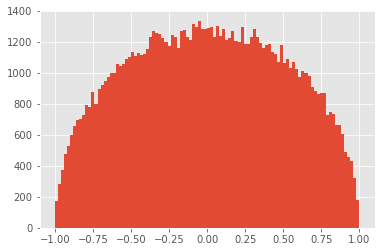

In [37]:
plt.hist(getSample(100000), 100)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [38]:
def getInitialState(N):
    state = np.random.randint(2, size=(N, N))
    state[state == 0] = -1
    return state


2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [39]:
def getDeltaE(i, j, state):
    N = len(state)
    E = state[i][j] * (state[(i - 1) % N][j] + state[(i + 1) % N][j] + state[i][(j - 1) % N] + state[i][(j + 1) % N])
    dE = float(2 * E)
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [40]:
def makeFlip(T, state):
    N = len(state)
    i = np.random.randint(0, N, size=1)[0]
    j = np.random.randint(0, N, size=1)[0]

    for _ in range(N ** 2):
      dE = getDeltaE(i, j, state)
      if dE <= 0:
          state[i][j] *= -1  
      else:
          dist = np.random.uniform(0, 1)
          if dist <= np.e ** (-dE / T):
              state[i][j] *= -1  

      i = np.random.randint(0, N, size=1)[0]
      j = np.random.randint(0, N, size=1)[0]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [41]:
def getEnergy(state):
    N = len(state)
    E = 0
    for i in range(N):
      for j in range(N):
        E_ij = state[i][j] * (state[(i - 1) % N][j] + state[(i + 1) % N][j] + state[i][(j - 1) % N] + state[i][(j + 1) % N])
        E += E_ij
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [43]:
def getMagnetization(state):    
    N = len(state)
    M = 0
    for i in range(N):
        for j in range(N):
            M += state[i][j]
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [44]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

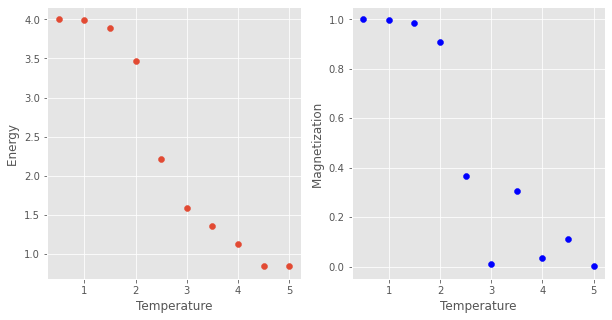

In [45]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?


Обратим внимание, что при достижении температуры Кюри происходит фазовый переход => намагниченность пропадает (аналогично для энергии). С ростом температуры энергия и намагниченность уменьшаются - это соответствует феромагнетикам

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

C:\Users\79833\AppData\Local\Temp\ipykernel_18284\2552284765.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(state)


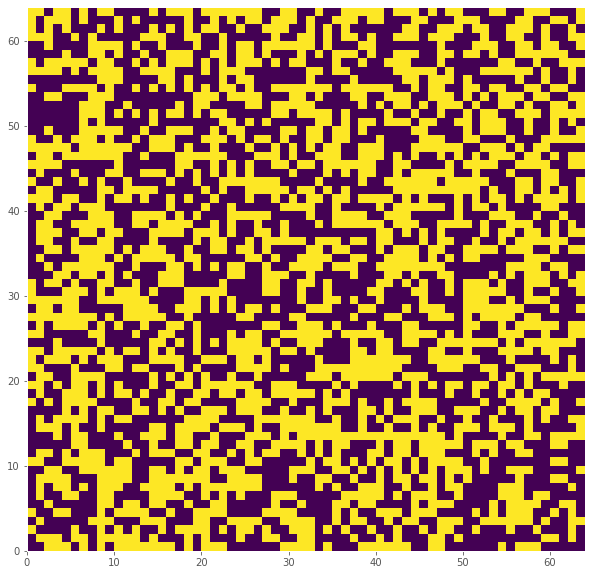

In [52]:
N = 64
state = getInitialState(N)
plt.figure(figsize=(10, 10))
plt.pcolormesh(state)
plt.show()

C:\Users\79833\AppData\Local\Temp\ipykernel_18284\3217962689.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(state1)
C:\Users\79833\AppData\Local\Temp\ipykernel_18284\3217962689.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(state2)


<Figure size 432x288 with 0 Axes>

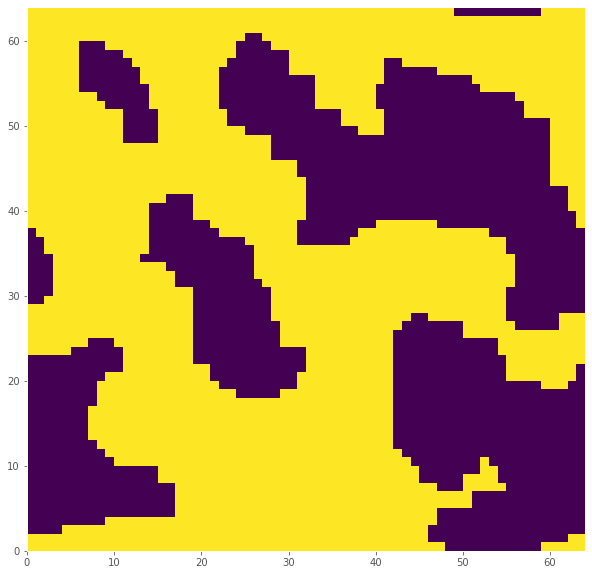

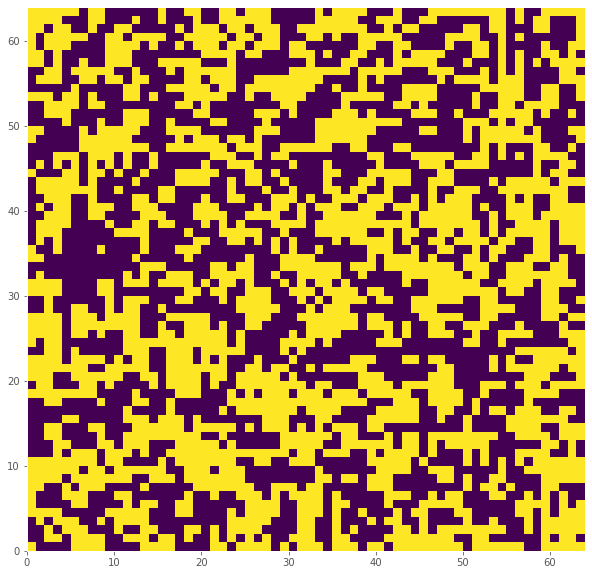

In [53]:
plt.figure()
N = 64
state = getInitialState(N)
plt.figure(figsize=(10, 10))

for i in range(20):
    state1 = makeFlip(0.5, state)

plt.pcolormesh(state1)

makeFlip(0.5, state)
plt.figure(figsize=(10, 10))
for k in range(15):
    state2 = makeFlip(5, state)    
plt.pcolormesh(state2)
plt.show()


Видим разное соотношение направлений спинов, так при низких температурах - спины стремятся ориентироваться одинаково, мы видим кластеры, а при высоких количество разных спинов равное